# A. Enunciado de la práctica

## 1. Objetivos de la práctica
El desarrollo de esta práctica pretende que el alumnado analice, diseñe e implemente soluciones a un problema usando las técnicas de computación evolutiva impartidas en la asignatura Inteligencia Artificial (IA). Para ello, el alumnado desarrollará de forma grupal (por cuartetos) un proyecto de programación en lenguaje Python mediante el uso del entorno de programación Google Colab y cuadernos de Python.

## 2. Caso de estudio
Se pretende resolver un problema de planificación de horarios para un grupo de los grados comunes de la E.T.S. de Ingeniería de Sistemas Informáticos. El problema de planificación de horarios consiste en distribuir $N$ asignaturas, cada una con un número $h_i$ de horas semanales, en un horario de $M$ días con $k$ horas por día, asegurando que se cumplan las siguientes restricciones:

* Cada hora de cada asignatura se debe impartir en un día y hora diferente, i.e. no puede haber solapamiento de horas.
* No se pueden impartir más de 2 horas de la misma asignatura el mismo día.

El objetivo es encontrar una planificación de horarios que tenga en cuenta las siguientes preferencias:

* Se desea que el horario sea lo más continuo posible, i.e. que no haya huecos vacíos al día entre asignatura y asignatura, o que este sea mínimo.
* Se desea que el horario sea lo más compacto posible, i.e. que se utilicen el menor número de días posibles.
* Se desea que si una asignatura imparte más de una hora al día, estas horas sean consecutivas.

Por ejemplo, si tenemos $N=3$ asignaturas (IA, ALG y BD) con las siguientes horas semanales: $h_1 = 1$, $h_2 = 2$ y $h_3 = 3$, y un horario de $M=3$ días con $k=3$ horas por día, una posible planificación sería:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  ALG   | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |  BD    | IA     |       |

Esta planificación cumple las restricciones, ya que no hay solapamiento de horas y no se imparten más de 2 horas de la misma asignatura el mismo día. Además, la solución es óptima ya que cumple todas las preferencias: no hay huecos entre asignaturas, el número de días es el menor posible y las horas de las asignaturas que se imparten más de una vez al día son consecutivas.

La siguiente solución sería válida, pero no óptima:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  IA    | BD     | ALG   |
| Hora 2  |        |        |       |
| Hora 3  |  BD    | BD     | ALG   |

Se puede apreciar que hay huecos entre asignaturas, que el número de días no es lo menor posible y que las horas de las asignaturas que se imparten más de una vez al día no son consecutivas.

Finalmente, se muestra un ejemplo de solución no válida:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  | IA/ALG | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |        | BD     |       |

Se puede apreciar que hay solapamiento de horas y que se imparten más de 2 horas de la misma asignatura el mismo día.

Para resolver este problema, se propone el uso de un algoritmo genético. El algoritmo genético deberá ser capaz de generar una población inicial de soluciones, evaluar la calidad de cada solución, seleccionar las mejores soluciones, cruzarlas y mutarlas para generar una nueva población de soluciones. El algoritmo deberá ser capaz de encontrar una solución óptima (o cercana al óptimo en los casos más complejos) en un tiempo razonable.

## 3. Desarrollo
El desarrollo de esta práctica supone completar este cuaderno de python para resolver el problema para varias configuraciones diferentes usando algoritmos genéticos. Además, usando este cuaderno de python, se quieren mostrar resultados de la ejecución de los algoritmos para extraer conclusiones sobre las configuraciones del problema. También se desea hacer una comparativa entre los algoritmos genéticos propuestos, las distintas representaciones propuestas, los distintos operadores y parámetros de configuración de los algoritmos genéticos, etc.

### 3.1 Primera aproximación

Como primera aproximación, se desarrollará un algoritmo genético para resolver el problema usando la siguiente representación y función de fitness:

* **Representación**: Cada solución será un array de tamaño $h_1 + h_2 + \ldots + h_N$ con alfabeto valores enteros en el rango $\Omega = [0, M \times k - 1]$. Cada valor del array representará la hora (con el correspondiente día) en la que se imparte cada hora de la asignatura $i$, i.e. si $sol_{i_0} = j$, la primera hora de la asignatura $i$ se imparte en el día $j // k$ y en la hora $j \% k$. E.g. en el ejemplo 1 del enunciado, la solución sería $sol = [5, 0, 1, 2, 3, 4]$.
* **Función de fitness**: La función de fitness se define mediante la siguiente fórmula:

$$ fitness(sol) = \left\{ \begin{array}{ll} 0 & \text{si } C_1 > 0 \; || \; C_2 > 0 \\ \\ \frac{1}{1+ P_1 + P_2 + P_3} & \text{en otro caso} \end{array} \right. $$

  donde:

* $C_1 =$ Número de solapamientos entre asignaturas. E.g. en el ejemplo 3 del enunciado, $C_1 = 1$. Si hubiera tres asignaturas a la vez en una misma hora, se consideraría un solapamiento de 2; si hubiera cuatro asignaturas a la vez en una misma hora, se consideraría un solapamiento de 3, etc.
* $C_2 =$ Número de horas por encima de 2 de una misma asignatura impartidas el mismo día. E.g. en el ejemplo 3 del enunciado, $C_2 = 1$.
* $P_1 =$ Número de huecos vacíos entre asignaturas. E.g. en el ejemplo 2 del enunciado, $P_1 = 3$. Si hubiera dos huecos entre asignaturas, se consideraría un hueco de 2; si hubiera tres huecos entre asignaturas, se consideraría un hueco de 3, etc.
* $P_2 =$ Número de días utilizados en los horarios. E.g. en el ejemplo 1 del enunciado, $P_2 = 2$.
* $P_3 =$ Número de asignaturas con horas NO consecutivas en un mismo día. E.g. en el ejemplo 2 del enunciado, $P_3 = 2$.

Utilizando la representación y función de fitness propuestas, se aplicará el algoritmo genético utilizando las siguiente configuración:
* **Población inicial**: $pop_{size}=50$ soluciones aleatorias.
* **Selección**: Selección por torneo con $T=2$.
* **Cruce**: Cruce de un punto con probabilidad $P_{cruce}=0.8$.
* **Mutación**: Mutación uniforme con probabilidad $P_{mut}=0.1$.
* **Selección ambiental (nueva población)**: Reemplazo generacional sin elitismo.
* **Criterio de parada**: Número de generaciones $n_{gens}=50$.

### 3.2 Aproximación final propuesta

Se deberá proponer una o varias aproximaciones finales para resolver el problema de planificación de horarios. Estas aproximaciones deberán ser diferentes a la propuesta en la primera aproximación y deberán justificarse adecuadamente. Para cada aproximación se deberá proponer e implementar:
* **Representación**: Se puede proponer una representación diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la representación.
* **Función de fitness**: Se puede proponer una función de fitness diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la función de fitness.
* **Operadores genéticos**: Se pueden proponer operadores genéticos (selección, cruce y mutación) diferentes a los propuestos en la primera aproximación. Se deberá justificar adecuadamente la elección de los operadores genéticos. También se puede proponer una selección ambiental diferente que mejore la convergencia del algoritmo (e.g. usar elitismo).
* **Configuración del algoritmo genético**: Se pueden proponer parámetros de configuración diferentes a los propuestos en la primera aproximación (probabilidades, $pop_{size}$, etc), así como proponer un criterio de parada diferente que mejore la convergencia del algoritmo (e.g. parar cuando la fitness se estanque). En ningún caso, $pop_{size}$ ni $n_{gens}$ podrán ser superiores a 100. Se deberá justificar adecuadamente la elección de los parámetros de configuración.

### Experimentación

Dada la naturaleza estocástica de los algoritmos genéticos, cada aproximación (con cada configuración que se pruebe) deberá ser evaluada al menos 31 veces con distintos números aleatorios (semillas). Para cada aproximación, se deberá proporcionar una tabla comparativa entre la primera aproximación y las aproximaciones finales propuestas. Se deberá hacer un análisis estadístico de los resultados obtenidos obteniendo la media y desviación estándar de las 31 ejecuciones tanto para los distintos indicadores de calidad (C1, C2, P1, P2, P3) de la mejor solución encontrada en cada ejecución, como para los tiempos de ejecución y el número de generación en el cual ha parado la ejecución.

En cada aproximación, se deberá mostrar gráficamente la evolución de la fitness de la mejor solución y de la media de la población en cada generación para la peor ejecución, la mejor ejecución y la ejecución media. Además, se deberá mostrar la mejor solución encontrada en cada una de estas tres ejecuciones.

Para cada aproximación propuesta se debe proporcionar una tabla de estas características (Puede usarse un generador de tablas https://www.tablesgenerator.com/markdown_tables o pandas https://pandas.pydata.org/docs/user_guide/index.html):

| Dataset | Algoritmo | Tiempo(s)   | Generaciones | C1        | C2        | P1        | P2        | P3        |
|---------|-----------|-------------|--------------|-----------|-----------|-----------|-----------|-----------|
|   1     |  Primero  | $10\pm 3.5$ | $50\pm 0$    | $1\pm 1$  | $2\pm 1$  | $1\pm 2$  | $3\pm 1$  | $2\pm 1$  |
|   1     |  Final 1  | $5 \pm 1.2$ | $38\pm 12$   | $0\pm 0$  | $0\pm 0$  | $0\pm 1$  | $2\pm 1$  | $0\pm 1$  |
|   2     |  Final 1  | $25\pm 2.3$ | $73\pm 22$   | $0\pm 0$  | $0\pm 1$  | $1\pm 1$  | $3\pm 0$  | $1\pm 1$  |

## 4. Normativa de la práctica
Para el desarrollo del proyecto de programación se proporciona este cuaderno que sirve a modo de proyecto de programación. Se han propuesto varias configuraciones de horarios para utilizar en las distintas pruebas. Se permiten crear todas las funciones adicionales que sea necesario siempre y cuando se respete la estructura general de este cuaderno. Este cuaderno es el único entregable, por tanto desarrollar código fuera de él no es recomendable.

Además de explicar las decisiones tomadas, será necesario realizar una comparativa de resultados en una o varias tablas, así como incluir una comparativa final.

La práctica debe realizarse teniendo en cuenta la siguiente normativa:
* NO está permitido alterar los nombres, parámetros ni tipo de retorno de ninguno de los métodos proporcionados. El método modificado se evaluará como 0 así como todos los métodos que dependan de él.
* No está permitido el uso de librerías externas excepto numpy y pandas. El uso de librerías externas hará que se evalúe la práctica como 0.
* La práctica se realizará de forma grupal (grupos de 4 alumnos). Cada grupo deberá desarrollar de manera independiente su propia práctica y realizar su propia entrega.
* El plagio de la práctica queda estrictamente prohibido. La detección de plagio supondrá una calificación de 0 en la convocatoria de la asignatura para todos los alumnos implicados, así como la posibilidad de apertura de expediente académico disciplinar.
* Para ser evaluado de la práctica es obligatorio entregarla en plazo, habiendo realizado correctamente al menos una funcionalidad de las pedidas. Una entrega fuera de plazo será evaluada como 0.
* Usa este cuaderno a modo de memoria, justificando las decisiones que tomes a lo largo del proceso de desarrollo. El desarrollo en texto puntúa de cara a la nota de la práctica.
* De cara a la entrega es estrictamente necesario entregar el cuaderno ejecutado al completo. Una entrega que no haya sido ejecutada con éxito hasta la última celda será evaluada como 0. (Entregad el archivo .ipynb)
* Se debe comentar el código adecuadamente. Este apartado es puntuable.

# Cuerpo de la práctica
Usa las siguientes celdas para desarrollar todo el código pedido. Recuerda respetar esta estructura general y añadir celdas siempre dentro de cada apartado.

# Primera Aproximación

## Representación y función de fitness

### Representación

In [1]:
# Ejemplo de dataset de entrada para el problema de asignación de horarios
dataset = {"n_courses" : 3,
            "n_days" : 3,
            "n_hours_day" : 3,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

In [2]:
import numpy
import pandas
def generate_random_array_int(alphabet, length):
    random_array = [] # Definimos una lista vacia para analizar a continuacion los valores generados
    for i in range(length):  # Realizamos un bucle que repite el proceso tantas veces como length
      choice = numpy.random.choice(alphabet) # Por cada iteración, elegimos un valor aleatorio del alfabeto y lo agregamos a la lista
      random_array.append(choice)
    # Genera un array de enteros aleatorios de tamaño length
    # usando el alfabeto dado
    return random_array # Devolvemos la lista final con números aleatorios.


def generate_initial_population_timetabling(pop_size, *args, **kwargs):
    dataset = kwargs['dataset']
    initial_population = [] # Inicializamos una lista vacia para almacenar los arreglos generados
    alphabet = [] # Inicializamos una lista vacia que contendra los valores posibles
    length = 0
    for i in dataset.get("courses"): # Calculamos el tamaño total del horario
      length += i[1]
    for i in range(dataset.get("n_days") * dataset.get("n_hours_day")): # Creamos es alfabeto que representa todos los posibles slots de tiempo disponibles
      alphabet.append(i)
    for _ in range(pop_size): #Generamos la poblacion inicial
      random_array = generate_random_array_int(alphabet, length)
      initial_population.append(random_array)
    # Dataset con la misma estructura que el ejemplo
    # Obtener el alfabeto y la longitud a partir del dataset
    # Genera una población inicial de tamaño pop_size
    return initial_population #Devuelve la lista que contiene arreglos aleatorios

In [3]:
################################# NO TOCAR #################################
#                                                                          #
def print_timetabling_solution(solution, dataset):
    # Imprime una solución de timetabling
    n_days = dataset['n_days']
    n_hours_day = dataset['n_hours_day']
    courses = dataset['courses']

    # Crea una matriz de n_days x n_hours_day
    timetable = [[[] for _ in range(n_hours_day)] for _ in range(n_days)]

    # Llena la matriz con las asignaturas
    i = 0
    max_len = 6 # Longitud del título Día XX
    for course in courses:
        for _ in range(course[1]):
            day = solution[i] // n_hours_day
            hour = solution[i] % n_hours_day
            timetable[day][hour].append(course[0])
            i += 1
            # Calcula la longitud máxima del nombre de las asignaturas
            # en una misma franja horaria
            max_len = max(max_len, len('/'.join(timetable[day][hour])))

    # Imprime la matriz con formato de tabla markdown
    print('|         |', end='')
    for i in range(n_days):
        print(f' Día {i+1:<2}{" "*(max_len-6)} |', end='')
    print()
    print('|---------|', end='')
    for i in range(n_days):
        print(f'-{"-"*max_len}-|', end='')
    print()
    for j in range(n_hours_day):
        print(f'| Hora {j+1:<2} |', end='')
        for i in range(n_days):
            s = '/'.join(timetable[i][j])
            print(f' {s}{" "*(max_len-len(s))}', end=' |')
        print()
#                                                                          #
################################# NO TOCAR #################################

In [4]:
# Ejemplo de uso de la función generar individuo con el dataset de ejemplo
candidate = generate_random_array_int(list(range(9)), 6)
print_timetabling_solution(candidate, dataset)

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        |        |        |
| Hora 2  | BD     | ALG/BD |        |
| Hora 3  |        | ALG    | IA/BD  |


### Función de fitness

In [5]:
def calculate_c1(solution, *args, **kwargs):
    dataset = kwargs['dataset']
  # Calcula el numero de asignaturas en una misma franja horaria
    count = 0 # Inicializa el contador de asignaturas que hay en una misma franja horaria

    for i in get_array_solution(solution, dataset=dataset): # Convierte la solucion en forma de lista
      for d in i:
        if d>1:
          count += (d-1)

    return count # Devuelve el contador

def calculate_c2(solution, *args, **kwargs):
    dataset = kwargs['dataset']
  # Calcula la cantidad de horas por encima de 2 que se imparten
  # de una misma asignatura en un mismo día

    courses = []  # Inicializa una lista llamada 'courses' para representar los días y las asignaturas
    count = 0 # También se inicializa un contador 'count' en 0

    # Crea una lista de listas para representar la cantidad de horas asignadas a cada curso en cada día
    # Se inicializa con el valor -2 para indicar que aún no se ha asignado ninguna hora
    for i in range(dataset.get("n_days")):  # Itera sobre la cantidad de días
        courses.append([])  # Añade una lista vacía para cada día
        for _ in range(dataset.get("n_courses")):  # Itera sobre la cantidad de cursos
            courses[i].append(-2)  # Inicializa cada curso con -2 horas

    # Creamos una variable para recorrer las soluciones proporcionadas en 'solution'
    iterator = 0

    # Itera a través de todos los cursos que se encuentran en el dataset
    for i in range(len(dataset.get("courses"))):
        numHours = 0  # Inicializa el contador de horas asignadas para el curso actual.

        # Mientras no se hayan asignado todas las horas requeridas para este curso
        while numHours < dataset.get("courses")[i][1]:
            # Incrementa la cantidad de horas asignadas al curso en el día correspondiente
            # El cálculo utiliza la solución para determinar el día y el índice del curso
            courses[solution[iterator] // dataset.get("n_hours_day")][i] += 1

            # Avanza el índice del iterador para procesar la siguiente asignación
            iterator += 1

            # Incrementa el contador de horas asignadas para este curso
            numHours += 1

    # Ahora se recorre la matriz 'courses' para contar cuántas horas de más (sobre 2)
    # se han asignado a un curso en un mismo día
    for i in range(len(courses)):  # Itera a través de los días
        for j in range(len(courses[i])):  # Itera a través de los cursos de cada día
            if courses[i][j] > 0:  # Si el curso tiene horas asignadas en el día actual
                count += courses[i][j]  # Suma la cantidad de horas asignadas

    # Devuelve el total de horas asignadas por encima del valor esperado (2 horas)
    return count

def calculate_p1(solution, *args, **kwargs):
    dataset = kwargs['dataset']
     # Calcula el número de huecos vacíos entre asignaturas
    num_empty_hours = 0 # Contador de huecos vacíos totales
    num_aux = 0 # Contador temporal para huecos vacíos en un bloque específico
    can_have = False # Indicador de si se ha encontrado una asignatura en un día

    # Obtiene una representación de la solución en forma de matriz (días x horas)
    for i in get_array_solution(solution, dataset=dataset):
      for d in range(len(i)): # Itera sobre las horas en un día específico
        if i[d]>0 and not can_have:
          # Si se encuentra una hora asignada (>0) y no había una asignatura antes,
          # activa el indicador para empezar a detectar huecos vacíos
          can_have = True
        else :
          # Si no es la primera o última hora del día y hay un hueco vacío (0),
          # y ya se detectó el inicio de un bloque de asignaturas incrementa el contador temporal de huecos vacíos
          if d != 0 and d != len(i)-1 and i[d]==0 and can_have:
            num_aux += 1

          # Si se encuentra otra hora asignada después de un hueco vacío suma los huecos encontrados al contador total
          # y reinicia el contador temporal y el indicador de bloque
          elif i[d]>0 and can_have:
            num_empty_hours += num_aux
            num_aux = 0
            can_have = False
    # Devuelve el total de huecos vacíos encontrados entre asignaturas
    return num_empty_hours

def calculate_p2(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de días utilizados en los horarios
    n_days = 0  # Contador del número de días utilizados
    day_counter = False  # Indicador para verificar si el día tiene asignaturas

    # Obtiene una representación de la solución en forma de matriz (días x horas)
    for d in get_array_solution(solution, dataset=dataset):
      for i in d:
        if i>0:
          # Si se encuentra una asignatura (>0) en el día actual,
          # activa el indicador para contar este día
          day_counter = True
      # Si se detectó que el día tiene al menos una asignatura, incrementa el contador
      if day_counter:
        n_days += 1
        # Reinicia el indicador para el próximo día
        day_counter = False
    return n_days

def calculate_p3(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Calcula el número de asignaturas con horas NO consecutivas en un mismo día
    non_consecutive_count = 0 # Contador de horas no consecutivas
    iterator = 0 # Índice para recorrer la solución
    for i in range(len(dataset.get("courses"))):
      numHours = 0 # Número de horas asignadas actualmente para la asignatura
      hours = [] # Lista para almacenar las horas asignadas por día para esta asignatura

      # Inicializa una lista de días, donde cada día tiene inicialmente una lista vacía
      for _ in range(dataset.get("n_days")):
        hours.append([])

      # Mientras no se hayan asignado todas las horas requeridas para esta asignatura
      while numHours<dataset.get("courses")[i][1]:
        if hours[solution[iterator]//dataset.get("n_hours_day")]==[]:
          # Si el día actual no tiene horas asignadas, agrega la hora actual
          hours[solution[iterator]//dataset.get("n_hours_day")].append(solution[iterator])
        else:
          # Si el día ya tiene horas asignadas, verifica la no-consecutividad
          for d in hours[solution[iterator]//dataset.get("n_hours_day")]:
            # Si la diferencia entre la hora actual y una hora ya asignada
            # en el mismo día es mayor a 1 (no consecutiva), incrementa el contador
            if d-solution[iterator]<-1: # Caso en que la hora actual es posterior
              non_consecutive_count += 1
            elif d-solution[iterator]>0: # Caso en que la hora actual es anterior
              if d-solution[iterator]>1:
                non_consecutive_count += 1
              # Actualiza la hora registrada más reciente para el día
              hours[solution[iterator]//dataset.get("n_hours_day")][0] = solution[iterator]
        iterator += 1 # Avanza al siguiente índice en la solución
        numHours += 1 # Incrementa el número de horas asignadas para esta asignatura
    return non_consecutive_count

def fitness_timetabling(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    c1 = calculate_c1(solution, dataset=dataset)
    c2 = calculate_c2(solution, dataset=dataset)
    p1 = calculate_p1(solution, dataset=dataset)
    p2 = calculate_p2(solution, dataset=dataset)
    p3 = calculate_p3(solution, dataset=dataset)
    if c1>0 or c2>0:
      return 0
    return 1/(1+p1+p2+p3)

    # Calcula el fitness de una solución de timetabling siguiendo la fórmula del enunciado

def get_array_solution(solution, *args, **kwargs):
    dataset = kwargs['dataset']
    # Convierte la solución en un formato estructurado (matriz días x horas)
    # Cada celda de la matriz indica cuántas asignaturas se programaron en esa hora
    array = [] # Inicializa la matriz que contendrá los días y las horas
    # Construye la estructura de la matriz con días y horas
    for i in range(dataset.get("n_days")):  # Itera sobre el número de días disponibles
      array.append([]) # Agrega una lista vacía para representar las horas de cada día
      for _ in range(dataset.get("n_hours_day")): # Itera sobre el número de horas en cada día
        array[i].append(0) # Inicializa cada celda con 0

    # Llena la matriz con las asignaciones de la solución
    for d in solution:
      if d>2: # Si el valor `d` es mayor a 2, significa que está programado en un día válido
        day = d//dataset.get("n_hours_day")
        hour = d % dataset.get("n_hours_day")
        array[day][hour] += 1 # Incrementa el contador en esa celda para reflejar una asignatura programada
      else: array[0][d] +=1 # Si el valor `d` es 2 o menor, se considera asignado al primer día
    return array

# Pistas:
# - Una función que devuelva la tabla de horarios de una solución
# - Una función que devuelva la cantidad de horas por día de cada asignatura
# - A través de args y kwargs se pueden pasar argumentos adicionales que vayamos a necesitar

In [6]:
fitness_timetabling(candidate, dataset=dataset) # Devuelve la fitness del candidato de ejemplo

0

## Operadores genéticos

### Selección por torneo

In [7]:
def tournament_selection(population, fitness, number_parents, *args, **kwargs):
    # Selecciona number_parents individuos de la población mediante selección por torneo
    t = 2
    parents = []
    for _ in range(number_parents):
        # Seleccionar 't' individuos aleatoriamente
        indices = numpy.random.choice(len(population), t, replace=False)
        candidatos = [(population[i], fitness[i]) for i in indices]
        # Escoger al individuo con mejor fitness
        ganador = max(candidatos, key=lambda x: x[1])[0]
        parents.append(ganador)
    return parents

# Pista:
# - Crear una función auxiliar que genere un padre a partir de una selección por torneo
# - Recuerda usar la misma librería de números aleatorios que en el resto del código

### Cruce de un punto

In [8]:
def one_point_crossover(parent1, parent2, p_cross, *args, **kwargs):
    # Realiza el cruce de dos padres con una probabilidad p_cross
    child1 = parent1.copy()
    child2 = parent2.copy()
    if numpy.random.rand() < p_cross:
      cross = numpy.random.randint(1, len(parent1))
      child1 = parent1[:cross] + parent2[cross:]
      child2 = parent2[:cross] + parent1[cross:]
    return child1, child2

### Mutación uniforme

In [9]:
def uniform_mutation(chromosome, p_mut, *args, **kwargs):
    dataset = kwargs['dataset']
  # Dataset con la misma estructura que el ejemplo
    alphabet = []
    for i in range(dataset.get("n_days") * dataset.get("n_hours_day")):
      alphabet.append(i)
    for i in range(len(chromosome)):
      if numpy.random.rand() < p_mut:
        chromosome[i] = numpy.random.choice(alphabet)
    # Realiza la mutación gen a gen con una probabilidad p_mut
    # Obtener el alfabeto del dataset para aplicar la mutación
    return chromosome

### Selección ambiental (reemplazo generacional)

In [10]:
def generational_replacement(population, fitness, offspring, fitness_offspring, *args, **kwargs):
    # Realiza la sustitución generacional de la población
    # Debe devolver tanto la nueva población como el fitness de la misma
    return offspring, fitness_offspring

## Algoritmo genético

### Condición de parada (número de generaciones)

In [11]:
def generation_stop(generation, fitness, *args, **kwargs):
    max_gen=kwargs['max_gen']
    # Comprueba si se cumple el criterio de parada (máximo número de generaciones)
    return generation >= max_gen

### Algoritmo genético

In [12]:
def genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                      selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    dataset = kwargs['dataset']
    # Aplica un algoritmo genético a un problema de maximización
    population = generate_population(pop_size, dataset, *args, **kwargs) # Crea la población de individuos de tamaño pop_size
    fitness = [] # Contiene la evaluación de la población
    best_fitness = [] # Guarda el mejor fitness de cada generación
    mean_fitness = [] # Guarda el fitness medio de cada generación
    generation = 0 # Contador de generaciones

    for i in range(len(population)):
      fitness.append(fitness_function(population[i], *args, **kwargs))

    best_fitness.append(max(fitness))
    mean_fitness.append(sum(fitness) / len(fitness))

    while not stopping_criteria(generation, fitness, *args, **kwargs): # Mientras no se cumpla el criterio de parada
        offspring = []
        fitness_offspring = []
        generation += 1 # Incrementa el contador de generaciones
        parents = selection(population, fitness, offspring_size)
        for i in range(0, len(parents), 2):
          if i+1 < len(parents):
            child1,child2 = crossover(parents[i], parents[i+1], p_cross, *args, **kwargs)
            child1 = mutation(child1, p_mut, dataset, *args, **kwargs)
            child2 = mutation(child2, p_mut, dataset, *args, **kwargs)
            offspring.append(child1)
            offspring.append(child2)
            fitness_offspring.append(fitness_function(child1, *args, **kwargs))
            fitness_offspring.append(fitness_function(child2, *args, **kwargs))
        population, fitness = environmental_selection(population, fitness, offspring, fitness_offspring, *args, **kwargs)
        best_fitness.append(max(fitness))
        mean_fitness.append(sum(fitness) / len(fitness))

    # 1 - Inicializa la población con la función generate_population
    # 2 - Evalúa la población con la función fitness_function
    # 3 - Mientras no se cumpla el criterio de parada stopping_criteria
    # 4 - Selección de padres con la función selection
    # 5 - Cruce de padres mediante la función crossover con probabilidad p_cross
    # 6 - Mutación de los descendientes con la función mutation con probabilidad p_mut
    # 7 - Evaluación de los descendientes
    # 8 - Generación de la nueva población con la función environmental_selection

    return population, fitness, generation, best_fitness, mean_fitness

# Aproximación final propuesta
Usa las siguientes celdas para desarrollar la aproximación final propuesta. Elimina aquellas que no apliquen en tu caso.

## Representación y función de fitness propuestas

### Representación(es) propuesta(s)

In [13]:
### Coloca aquí tus funciones propuestas para la generación de población inicial ###

import numpy as np

def generate_initial_population(popsize, h, M, k):

   # Genera una población inicial de soluciones aleatorias.

   # Args:
        # popsize (int): Tamaño de la población (número de soluciones).
        # h (list): Lista de horas por asignatura (h1, h2, ..., hN).
        # M (int): Número de días.
        # k (int): Número de horas por día.

    # Returns:
        # list: Lista de soluciones iniciales (cada solución es un array de enteros).

    population = []
    for _ in range(popsize):
        solution = generate_random_solution(h, M, k)  # Genera una solución aleatoria
        population.append(solution)
    return population

### Función(es) de fitness propuesta(s)

In [14]:
### Coloca aquí tus funciones de fitness propuestas ###

def fitness(individual):

    # Calcula el fitness de un individuo.

    # Args -> individual: Solución a evaluar.

    # Returns -> Fitness del individuo.

    # Cálculo de restricciones
    C1 = count_overlaps(individual)  # Número de solapamientos (calculados con calculate_C1)
    C2 = count_hours_per_day(individual)  # Número de horas por encima de 2 por día (calculados con calculate_c2)

    # Penalización por restricciones incumplidas
    if C1 > 0 or C2 > 0:
        return 0

    # Cálculo de preferencias
    P1 = count_gaps(individual)  # Número de huecos (calculados con calculate_p1)
    P2 = count_days_used(individual)  # Días utilizados (calculados con calculate_p2)
    P3 = count_non_consecutive_hours(individual)  # Horas no consecutivas (calculados con calculate_p3)

    # Fitness escalado
    return 1 / (1 + P1 + P2 + P3)

## Operadores genéticos

### Selección

In [15]:
def tournament_selection(population, fitness, offspring_size, tournament_size=2):
    selected_individuals = []
    for _ in range(offspring_size):
        # Selecciona aleatoriamente tournament_size individuos de la población
        tournament = random.sample(range(len(population)), tournament_size)
        # Selecciona el individuo con la mejor fitness del torneo
        best_individual = tournament[0]
        for individual in tournament[1:]:
            if fitness[individual] > fitness[best_individual]:
                best_individual = individual
        # Agrega el individuo seleccionado a la lista de individuos seleccionados
        selected_individuals.append(population[best_individual])
    return selected_individuals

### Cruce

In [16]:
### Coloca aquí tus funciones de cruce propuestas ###

def crossover(parent1, parent2):

    # Cruce de un punto entre dos padres.

    # Args:
        # parent1: 1r padre.
        # parent2: 2o padre.

    # Returns:
        # Dos hijos generados a partir de los padres.

    # Punto de cruce aleatorio
    point = random.randint(1, len(parent1) - 1)

    # Generar hijos intercambiando segmentos
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    return child1, child2

### Mutación

In [17]:
### Coloca aquí tus funciones de mutación propuestas ###

def mutation(individual, mutation_prob=0.1):

    # Aplica mutación uniforme a un individuo con cierta probabilidad.

    # Args:
        # individual: Individuo que vamos a mutar.
        # mutation_prob: Probabilidad de mutación por gen.

    # Returns:
        # Individuo finalmente mutado.

    for i in range(len(individual)):
        if random.random() < mutation_prob:
            # Generar nuevo valor para el gen
            individual[i] = random.randint(0, M * k - 1)  # Actualiza con un valor válido
    return individual

### Selección ambiental

In [18]:
### Coloca aquí tus funciones de reemplazo propuestas ###

def elitism(old_population, new_population, elite_size=1):

   # Combina la población antigua y la nueva, manteniendo las mejores soluciones (elitismo).

   # Args:
        # old_population: Lista de individuos de la generación anterior.
        # new_population: Lista de individuos generados en la nueva generación.
        # elite_size: Número de mejores individuos que se preservarán de la generación anterior.

   # Returns:
     # Lista de individuos para la siguiente generación.

   # Combinar las poblaciones
     combined_population = old_population + new_population

   # Ordenar por fitness (descendente, mayor fitness es mejor)
     combined_population.sort(key=lambda ind: fitness(ind), reverse=True)

   # Seleccionar los mejores `popsize` individuos (elitismo incluido)
     next_generation = combined_population[:len(old_population)]

     return next_generation

#Decidimos esta ultima para mejorar la facilidad de implementación, complejidad y exploración de las generaciones
def only_change(offspring, fitness_offspring):
    #Intercambia la poblacion anterior por la nueva
    return offspring, fitness_offspring


### Criterio de parada

In [19]:
### Coloca aquí tus funciones de parada propuestas ###

def stop_criteria(best_fitness, current_fitness, stagnation_counter, max_stagnation, generation, max_generations):

    #Verifica si se cumple el criterio de parada basado en generaciones máximas o estancamiento.

    #Args:
        # best_fitness: Mejor fitness observado hasta ahora.
        # current_fitness: Fitness del mejor individuo actual.
        # stagnation_counter: Generaciones sin mejora del fitness.
        # max_stagnation: Máximo número de generaciones permitidas sin mejora.
        # generation: Generación actual.
        # max_generations: Número máximo de generaciones.

    #Returns:
       # True si se cumple el criterio de parada, False en caso contrario.

    # Estancamiento: No hay mejora en las últimas `max_stagnation` generaciones
    if current_fitness <= best_fitness:
        stagnation_counter += 1
    else:
        stagnation_counter = 0  # Reiniciar contador si hay mejora

    # Parar si se alcanza el estancamiento o el número máximo de generaciones
    if stagnation_counter >= max_stagnation:
        print(f"Parada anticipada por estancamiento en la generación {generation}.")
        return True, stagnation_counter

    if generation >= max_generations:
        print(f"Parada por alcanzar el número máximo de generaciones: {generation}.")
        return True, stagnation_counter

    return False, stagnation_counter

# Experimentos
Usa la función `run_ga` para extraer resultados.

## Utilidades
Usa estas funciones pre-programadas para ejecutar los experimentos y resumir el código.

### Temporizador

In [20]:
################################# NO TOCAR #################################
#                                                                          #
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        res = func(*args, **kwargs)
        end = time.time()
        return *res, end - start
    return wrapper
#                                                                          #
################################# NO TOCAR #################################

# Este codigo temporiza la ejecución de una función cualquiera

### Envoltorios

In [21]:
################################# NO TOCAR #################################
#                                                                          #
@timer
def run_ga(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
           selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Además del retorno de la función, se devuelve el tiempo de ejecución en segundos
    return genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                             selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs)
#                                                                          #
################################# NO TOCAR #################################


### Datasets
Configuraciones de horarios para utilizar en las pruebas.

In [22]:
# Se deben probar los 6 datasets
dataset1 = {"n_courses" : 3,
            "n_days" : 3,
            "n_hours_day" : 3,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

dataset2 = {"n_courses" : 4,
            "n_days" : 3,
            "n_hours_day" : 4,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("POO", 2)]}

dataset3 = {"n_courses" : 4,
            "n_days" : 4,
            "n_hours_day" : 4,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4)]}

dataset4 = {"n_courses" : 5,
            "n_days" : 4,
            "n_hours_day" : 6,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4)]}

dataset5 = {"n_courses" : 7,
            "n_days" : 4,
            "n_hours_day" : 8,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2)]}

dataset6 = {"n_courses" : 11,
            "n_days" : 5,
            "n_hours_day" : 12,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2), ("FC", 4), ("TSO", 2), ("AM", 4), ("LMD", 4)]}

### Generación de números aleatorios

In [23]:
import numpy as np
import random

def set_seed(seed):
    # Se debe fijar la semilla usada para generar números aleatorios
    # Con la librería random
    random.seed(seed)
    # Con la librería numpy
    np.random.seed(seed)

### Métricas
Métricas a estudiar en los experimentos.

In [24]:
################################# NO TOCAR #################################
#                                                                          #
def best_solution(population, fitness):
    # Devuelve la mejor solución de la población
    return population[fitness.index(max(fitness))]

import matplotlib.pyplot as plt
def plot_fitness_evolution(best_fitness, mean_fitness):
    plt.plot(best_fitness, label='Best fitness')
    plt.plot(mean_fitness, label='Mean fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()
#                                                                          #
################################# NO TOCAR #################################

### Lanzador de experimentos

In [25]:
from statistics import mean, median, stdev

def launch_experiment(seeds, dataset, generate_population, pop_size, fitness_function, c1, c2, p1, p2, p3, stopping_criteria,
                      offspring_size, selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    best_individuals = []
    best_inds_c1 = []
    best_inds_c2 = []
    best_inds_p1 = []
    best_inds_p2 = []
    best_inds_p3 = []
    best_inds_fitness = []
    best_fitnesses = []
    mean_fitnesses = []
    last_generations = []
    execution_times = []
    # Ejecutamos el algoritmo con cada semilla
    for seed in seeds:
        print(f"Running Genetic Algorithm with seed {seed}")
        set_seed(seed)
        population, fitness, generation, best_fitness, mean_fitness, execution_time = run_ga(generate_population, pop_size, fitness_function,stopping_criteria,
                                                                                             offspring_size, selection, crossover, p_cross, mutation, p_mut,
                                                                                             environmental_selection, dataset=dataset, *args, **kwargs)
        best_individual = best_solution(population, fitness)
        best_ind_c1 = c1(best_individual, dataset=dataset)
        best_ind_c2 = c2(best_individual, dataset=dataset)
        best_ind_p1 = p1(best_individual, dataset=dataset)
        best_ind_p2 = p2(best_individual, dataset=dataset)
        best_ind_p3 = p3(best_individual, dataset=dataset)
        best_ind_fitness = fitness_function(best_individual, dataset=dataset)
        best_individuals.append(best_individual)
        best_inds_c1.append(best_ind_c1)
        best_inds_c2.append(best_ind_c2)
        best_inds_p1.append(best_ind_p1)
        best_inds_p2.append(best_ind_p2)
        best_inds_p3.append(best_ind_p3)
        best_inds_fitness.append(best_ind_fitness)
        best_fitnesses.append(best_fitness)
        mean_fitnesses.append(mean_fitness)
        last_generations.append(generation)
        execution_times.append(execution_time)
    # Imprimimos la media y desviación típica de los resultados obtenidos
    print("Mean Best Fitness: " + str(mean(best_inds_fitness)) + " " + u"\u00B1" + " " + str(stdev(best_inds_fitness)))
    print("Mean C1: " + str(mean(best_inds_c1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c1)))
    print("Mean C2: " + str(mean(best_inds_c2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c2)))
    print("Mean P1: " + str(mean(best_inds_p1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p1)))
    print("Mean P2: " + str(mean(best_inds_p2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p2)))
    print("Mean P3: " + str(mean(best_inds_p3)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p3)))
    print("Mean Execution Time: " + str(mean(execution_times)) + " " + u"\u00B1" + " " + str(stdev(execution_times)))
    print("Mean Number of Generations: " + str(mean(last_generations)) + " " + u"\u00B1" + " " + str(stdev(last_generations)))
    # Mostramos la evolución de la fitness para la mejor ejecución
    print("Best execution fitness evolution:")
    best_execution = best_inds_fitness.index(max(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[best_execution], mean_fitnesses[best_execution])
    # Mostramos la evolución de la fitness para la ejecución mediana
    print("Median execution fitness evolution:")
    median_execution = best_inds_fitness.index(median(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[median_execution], mean_fitnesses[median_execution])
    # Mostramos la evolución de la fitness para la peor ejecución
    print("Worst execution fitness evolution:")
    worst_execution = best_inds_fitness.index(min(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[worst_execution], mean_fitnesses[worst_execution])

    return best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times

## Ejecuciones
Este espacio de la práctica está reservado a las ejecuciones de los algoritmos. Se recomienda el uso del método launch_experiment.

Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

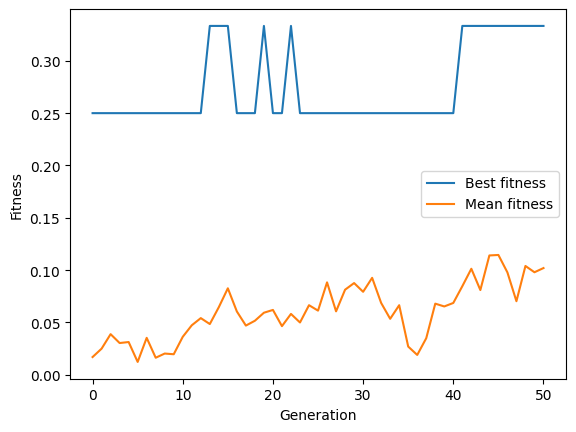

Median execution fitness evolution:


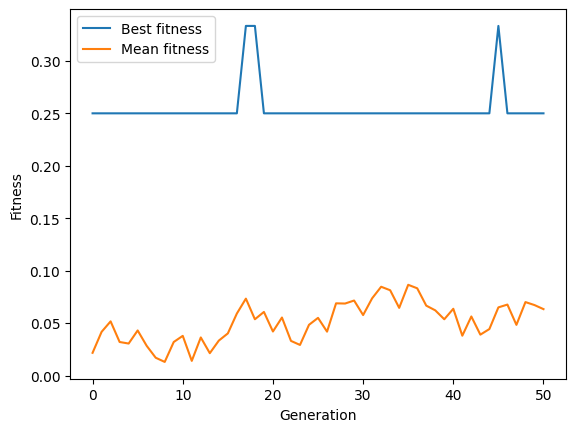

Worst execution fitness evolution:


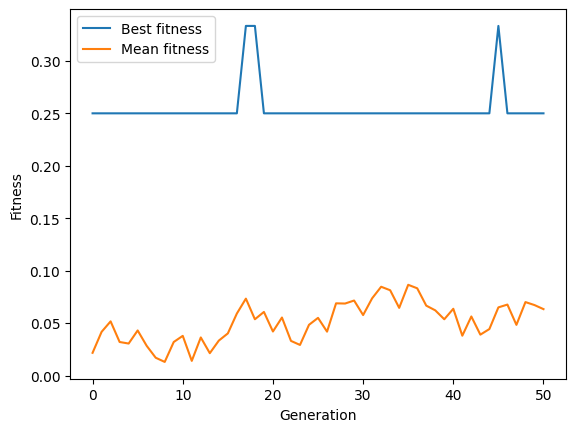

([[1, 5, 2, 4, 3, 6],
  [5, 1, 6, 4, 7, 2],
  [6, 5, 8, 3, 7, 4],
  [4, 5, 2, 6, 1, 3],
  [1, 6, 7, 2, 3, 4],
  [0, 3, 1, 2, 6, 4],
  [4, 5, 7, 3, 6, 1],
  [7, 5, 8, 6, 1, 0],
  [7, 4, 6, 3, 2, 8],
  [1, 5, 0, 3, 4, 2],
  [2, 6, 1, 0, 3, 7],
  [7, 5, 2, 8, 4, 1],
  [5, 3, 1, 2, 7, 4],
  [4, 3, 7, 6, 5, 1],
  [8, 3, 2, 5, 7, 4],
  [0, 1, 4, 7, 3, 2],
  [6, 1, 4, 0, 5, 7],
  [8, 7, 1, 5, 4, 6],
  [1, 2, 7, 4, 6, 5],
  [1, 2, 8, 3, 7, 0],
  [2, 5, 4, 6, 1, 3],
  [4, 3, 1, 2, 6, 5],
  [6, 2, 3, 4, 0, 1],
  [5, 8, 1, 4, 7, 6],
  [0, 5, 4, 7, 1, 6],
  [7, 3, 8, 1, 5, 6],
  [5, 4, 2, 1, 3, 0],
  [5, 6, 4, 7, 3, 8],
  [2, 1, 6, 7, 4, 5],
  [0, 1, 6, 5, 8, 7],
  [1, 3, 0, 4, 2, 5]],
 [0.25,
  0.25,
  0.3333333333333333,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.3333333333333333,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.3333333333333333,
  0.3333333333333333,
  0.25,
  0.25,
  0.3333333333333333]

In [26]:
# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
launch_experiment(seeds, dataset, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano

### Primera aproximación

In [ ]:
### EXPERIMENTOS PRIMERA APROXIMACIÓN ###
import numpy

# Definimos los datasets de entrada
datasets = [
    {"n_courses" : 3, "n_days" : 3, "n_hours_day" : 3, "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]},
    {"n_courses" : 4, "n_days" : 3, "n_hours_day" : 4, "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("POO", 2)]},
    {"n_courses" : 4, "n_days" : 4, "n_hours_day" : 4, "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4)]},
    {"n_courses" : 5, "n_days" : 4, "n_hours_day" : 6, "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4)]},
    {"n_courses" : 7, "n_days" : 4, "n_hours_day" : 8, "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2)]},
    {"n_courses" : 11, "n_days" : 5, "n_hours_day" : 12, "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2), ("FC", 4), ("TSO", 2), ("AM", 4), ("LMD", 4)]}
]


# Ejecutar el experimento para cada dataset
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
for dataset in datasets:
    print(f"Resultados para el dataset: {dataset}")
    launch_experiment(seeds, dataset, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)

Resultados para el dataset: {'n_courses': 3, 'n_days': 3, 'n_hours_day': 3, 'courses': [('IA', 1), ('ALG', 2), ('BD', 3)]}
Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with 

# **Resultados de la Primera Aproximación**
---
**TABLA DE RESULTADOS:**

| DATASET | ALGORITMO | TIEMPO(s)       | GENERACIONES | C1              | C2              | P1                | P2                | P3              |
|---------|-----------|-----------------|--------------|-----------------|-----------------|-------------------|-------------------|-----------------|
| 1       | Primero   | 0.3011 ± 0.0518 | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0.03225 ± 0.17960 | 2.67741 ± 0.47519 | 0 ± 0.0         |
| 2       | Primero   | 0.3567 ± 0.0612 | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0.4193 ± 0.7199   | 2.9677 ± 0.1796   | 0.3870 ± 0.5584 |
| 3       | Primero   | 0.5139 ± 0.0730 | 50 ± 0.0     | 5.3225 ± 1.3756 | 1.3548 ± 1.1415 | 1.5806 ± 1.5225   | 3.9677 ± 0.1796   | 1.9677 ± 1.1397 |
| 4       | Primero   | 0.6111 ± 0.0738 | 50 ± 0.0     | 6.4516 ± 1.4796 | 1.6774 ± 1.0452 | 3.0645 ± 1.8607   | 3.9354 ± 0.2497   | 3.9677 ± 1.6829 |
| 5       | Primero   | 0.8010 ± 0.1189 | 50 ± 0.0     | 8.0967 ± 1.5352 | 2.1290 ± 1.4315 | 4.8709 ± 1.8392   | 4 ± 0.0           | 6.0967 ± 1.9382 |
| 6       | Primero   | 1.1565 ± 0.1527 | 50 ± 0.0     | 10.193 ± 1.6617 | 1.4193 ± 1.2851 | 11.9354 ± 3.4052  | 5 ± 0.0           | 8.1935 ± 2.2864 |


## Análisis de los resultados
Los datos obtenidos muestran cómo el algoritmo genético aborda la optimización de horarios en diferentes escenarios (dataset 1 a 6). A continuación, analizamos las métricas clave:

1. **C1 (Número de solapamientos entre asignaturas):**
    - Datos: Aumenta significativamente conforme se avanza por los datasets, desde C1=0 en el dataset 1 hasta C1=10.193 en el dataset 6.
    - Interpretación: nos sugiere que la complejidad de los horarios crece en datasets más avanzadas de modo que supine más conflictos a resolver. El algoritmo no logra eliminarlos pir completo en los datasets más complejas.

2. **C2 (Horas por encima de 2 de una asignatura en un día)**
  
  - Datos: Oscila entre valores bajos (cercanos a 1 o 2), pero muestra fluctuaciones en los datasets más avanzados. Por ejemplo, C2=2.1290 en el dataset 5, pero decrece ligeramente a C2=1.4193 en el dataset 6.
  - Interpretación: consideramos que el algoritmo tiene un desempeño aceptable en limitar la cantidad de horas excesivas por asignatura, aunque no elimina completamente este problema en todos los escenarios.

3. **P1 (Huecos vacíos entre asignaturas):**

  - Datos: Aumenta de forma notable en datasets más complejos, desde P1=0.03225 en el dataset 1 hasta P1=11.9354 en el dataset 6.
  - Interpretación: La dispersión de asignaturas a lo largo del día se vuelve un problema significativo en escenarios más complejos. Esto sugiere que el algoritmo no prioriza esta métrica de manera efectiva en problemas más difíciles.

4. **P2 (Número de días utilizados):**
  - Datos: Incrementa desde P2= 2.6774 en el dataset 1 a P2=5 en el dataset 6.
  - Interpretación: La distribución de asignaturas en más días parece ser una estrategia que el algoritmo adopta automáticamente para manejar la complejidad de los horarios. Sin embargo, esto podría no ser ideal dependiendo de las restricciones del problema.

5. **P3 (Asignaturas con horas no consecutivas en un mismo día):**
  - Datos: Incrementa considerablemente en datasets más complejos, alcanzando un valor promedio de P3=8.1935 en el dataset 6.
  - Interpretación: Los horarios generados tienden a ser menos cohesivos en términos de bloques consecutivos de tiempo para una asignatura. Esto indica una mayor dificultad del algoritmo para optimizar esta métrica en problemas más complejos.

6. **Tiempo de ejecución:**
  - Datos: Incrementa conforme se avanza por los datasets, desde Tiempo=0.30115s en el dataset 1 hasta Tiempo=1.1565 en el dataset 6.
  - Interpretación: Esto es consistente con el aumento de la complejidad del problema y consideramos que se mantiene razonable a lo largo de la ejecución.

##ANÁLISIS ESTADÍSTICO

A continuación realizaremos el análisis estadístico de los resultados obtenidos obteniendo la media y desviación estándar de cada variable de la tabla.

```
import numpy as np

# Datos extraídos de la tabla de resultados
data = {
    "C1": [0, 0, 5.3225, 6.4516, 8.0967, 10.193],
    "C2": [0, 0, 1.3548, 1.6774, 2.1290, 1.4193],
    "P1": [0.03225, 0.4193, 1.5806, 3.0645, 4.8709, 11.9354],
    "P2": [2.67741, 2.9677, 3.9677, 3.9354, 4, 5],
    "P3": [0, 0.3870, 1.9677, 3.9677, 6.0967, 8.1935]
}

# Calcula media y desviación estándar de cada variable de la tabla
statistics = {
    key: {
        "media": np.mean(values),
        "des_est": np.std(values)
    }
    for key, values in data.items()
}

statistics


Resultado
{'C1': {'mean': 5.010633333333334, 'std_dev': 3.846367773483041},
 'C2': {'mean': 1.09675, 'std_dev': 0.8143549507636908},
 'P1': {'mean': 3.650491666666666, 'std_dev': 4.047410956032744},
 'P2': {'mean': 3.7580349999999996, 'std_dev': 0.7603531724084978},
 'P3': {'mean': 3.4354333333333336, 'std_dev': 2.9792123006295173}}
```

###OBSERVACIONES
1. **C1 (Número de Solapamientos entre Asignaturas):**
  > Media: C1 = 5.01

  > Desviación estándar: σ = 3.85

  La alta desviación estándar indica que el rendimiento del algoritmo varía considerablemente entre los datasets. Como bien ya hemos comentado, en los datasets más simples (1 y 2), el algoritmo elimina completamente los solapamientos (C1=0), pero en los más complejos (5 y 6), esta métrica empeora significativamente (C1>8). La misma afirmación es apollada por el valor de la media, es decir, el promedio se enfrentó a bastantes conflictos en los problemas más complejos.

2. **C2 (Horas por Encima de 2 de una Misma Asignatura):**
  > Media:C2 = 1.10

  > Desviación estándar: σ = 0.81

  Una baja desviación estándar indica que el algoritmo maneja esta métrica de forma consistente en todos los datasets. Aunque no elimina totalmente el problema, los valores de C2 permanecen bajos en general. En cuanto a la media, observamos que es relativamente baja, de modo que el algoritmo tiene una buena capacidad para evitar horarios con largas duraciones de clases por día para una misma asignatura.

3. **P1 (Huecos Vacíos entre Asignaturas):**
  > Media: P1 = 3.65

  > Desviación estándar: σ = 4.05

  Una media moderadamente alta combinada con una desviación estándar considerable sugiere que el problema de huecos vacíos entre asignaturas se acentúa en los datasets más complejos.
  El algoritmo tiene dificultades para minimizar esta métrica en problemas con mayor densidad de restricciones, generando horarios con mayor dispersión de clases a lo largo del día.

4. **P2 (Número de Días Utilizados):**
  > Media:P2 = 3.76

  > Desviación estándar: σ = 0.76

  La baja desviación estándar indica un comportamiento estable y predecible en esta métrica. El algoritmo tiende a distribuir las asignaturas en aproximadamente 4 días, lo cual pensamos que refleja un compromiso entre minimizar los solapamientos y manejar las restricciones.
  Sin embargo, el uso de más días podría no ser ideal para ciertas configuraciones donde se prefiera compactar los horarios en menos días.

5. **P3 (Asignaturas con Horas No Consecutivas en un Mismo Día):**
  > Media: P3=3.44

  > Desviación estándar: σ=2.98

  La alta variabilidad en esta métrica nos sugiere que en problemas más simples, el algoritmo puede evitar eficientemente asignaturas no consecutivas (P3≈0), pero en problemas más complejos, este valor crece considerablemente (P3>6).

## Conclusiones del Algoritmo:
**Fortalezas:**
  - El algoritmo maneja consistentemente métricas como C2 (evitar largas sesiones de clases) y P2 (distribución de días utilizados), manteniendo un desempeño estable incluso en escenarios complejos.
  - Es efectivo eliminando conflictos simples (C1=0) en datasets con restricciones moderadas (datasets 1 y 2).
  - Mantiene un tiempo de ejecución bajo en todos los escenarios.

**Debilidades:**
  - Pensamos que presenta dificultades en cuanto a la optimización de métricas relacionadas con la cohesión y compactación de horarios, como P1 (huecos vacíos) y P3 (horas no consecutivas), especialmente en problemas más complejos.
  - Su desempeño en C1 (solapamientos) se deteriora significativamente en problemas con mayores restricciones.
  - La tendencia a distribuir asignaturas en más días (P2) puede no ser óptima si el objetivo es compactar horarios.



##Conclusión General
  El algoritmo genético es eficiente en términos de tiempo y pensamos que logra buenos resultados en escenarios simples. Sin embargo, se desempeña peor en métricas clave (P1, P3, C1) a medida que aumenta la complejidad de los problemas. Esto sugiere la necesidad de ajustar su configuración, especialmente la función de fitness, para abordar con mayor eficacia los desafíos de horarios complejos.


##Posibles maneras para Mejorar el Algoritmo:
- Revisar la función de fitness para huecos (P1) y bloques no consecutivos (P3).
- Incorporar un componente de elitismo en la selección ambiental para preservar las mejores soluciones.
- Ajustar las probabilidades de cruce y mutación para explorar de forma más eficaz el espacio de búsqueda.
- Realizar pruebas con diferentes tamaños de población y torneos para observar cómo afectan a las métricas clave.


### Aproximaciones Propuestas

In [ ]:
### Coloca aquí tus experimentos ###


datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]
seeds = [1234567890 + i * 23 for i in range(31)]

for i, dataset in enumerate(datasets):
    print(f"\n=== Running experiments for Dataset {i + 1} ===")
    best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = launch_experiment(
        seeds, dataset, generate_initial_population_timetabling, 50, fitness_timetabling,
        calculate_c1, calculate_c2, calculate_p1, calculate_p2, calculate_p3,
        generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
        uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2
    )

**Resultados de Aproximaciones Propuestas**
#ANÁLISIS DE LOS RESULTADOS
---

**TABLA DE RESULTADOS**

| DATASET | ALGORITMO | TIEMPO(s)       | GENERACIONES | C1              | C2              | P1              | P2              | P3              |
|---------|-----------|-----------------|--------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1       | Final     | 0.2116 ± 0.0323 | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0 ± 0.0         | 2.8387 ± 0.3738 | 0 ± 0.0         |
| 2       | Final     | 0.2826 ± 0.0446 | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0.4193 ± 0.6204 | 3 ± 0.0         | 0.2258 ± 0.4973 |
| 3       | Final     | 0.4299 ± 0.0630 | 50 ± 0.0     | 5.5483 ± 1.0595 | 1.1935 ± 1.0138 | 1.1935 ± 1.0776 | 4 ± 0.0         | 2.0322 ± 0.9481 |
| 4       | Final     | 0.5164 ± 0.0712 | 50 ± 0.0     | 6.4516 ± 1.6500 | 1.4838 ± 0.9956 | 2.9677 ± 1.7220 | 3.9677 ± 0.1796 | 3.5161 ± 1.4803 |
| 5       | Final     | 0.6776 ± 0.1015 | 50 ± 0.0     | 8.2903 ± 1.7357 | 1.9677 ± 1.4487 | 5.7419 ± 2.7076 | 4 ± 0.0         | 5.8709 ± 1.5436 |
| 6       | Final     | 1.0495 ± 0.1843 | 50 ± 0.0     | 10.967 ± 2.2432 | 1.5483 ± 1.0275 | 13.838 ± 4.1960 | 5 ± 0.0         | 7.8064 ± 2.2718 |


1. **C1 (Número de solapamientos entre asignaturas):**

  - Datos: El valor de C1 incrementa de forma pronunciada a medida que los datasets se vuelven más complejos, desde C1=0 en el dataset 1 hasta C1=10.967 en el dataset 6.
  - Interpretación: En los datasets iniciales, el algoritmo elimina completamente los solapamientos, mostrando una alta eficacia. Sin embargo, en los escenarios más complejos, no logra resolver completamente los conflictos, reflejando una limitación del enfoque o de los recursos asignados a esta métrica en los problemas más avanzados.

2. **C2 (Horas por encima de 2 de una asignatura en un día):**
  - Datos: Oscila entre valores bajos en los datasets más simples y muestra fluctuaciones en los avanzados. Por ejemplo, C2=1.5483 en el dataset 6, comparado con C2=0 en los iniciales.
  - Interpretación: El algoritmo limita la cantidad de horas excesivas para cada asignatura en escenarios complejos, aunque no lo hace de manera uniforme. La reducción de C2 en el dataset 6 sugiere que, aunque la complejidad aumenta, el algoritmo prioriza esta métrica moderadamente bien.

3. **P1 (Huecos vacíos entre asignaturas):**

  - Datos: Incrementa de manera notable con la complejidad del problema, desde P1=0 en el dataset 1 a P1=13.838 en el dataset 6.
  - Interpretación: En los datasets avanzados, la dispersión de asignaturas se convierte en un problema grave. Esto indica que el algoritmo prioriza otras métricas por encima de reducir los huecos vacíos, especialmente cuando las restricciones del problema aumentan.

4. **P2 (Número de días utilizados):**

  - Datos: Incrementa progresivamente desde P2=2.8387 en el dataset 1 hasta P2=5 en el dataset 6.
  - Interpretación: El algoritmo utiliza más días para distribuir asignaturas en escenarios más complejos, probablemente para reducir conflictos (C1) y huecos (P1). Sin embargo, este comportamiento puede no ser ideal dependiendo de las restricciones específicas del problema, como la preferencia por compactar horarios en menos días.

5. **P3 (Asignaturas con horas no consecutivas en un mismo día):**

  - Datos: Incrementa considerablemente con la complejidad, alcanzando P3=7.8064 en el dataset 6.
  - Interpretación: Los horarios tienden a ser menos cohesivos en términos de bloques de tiempo, especialmente en los datasets más avanzados. Esto refleja una mayor dificultad para manejar la cohesión interna de los horarios conforme aumenta la complejidad del problema.

6. **Tiempo de ejecución:**

  - Datos: Aumenta desde Tiempo = 0.2116 en el dataset 1 hasta Tiempo=1.0495 en el dataset 6.
  - Interpretación: El tiempo de ejecución crece de forma consistente con la complejidad del problema, lo cual es esperable. A pesar del aumento, el tiempo de ejecución permanece razonable, mostrando que el algoritmo tiene un buen balance entre complejidad computacional y rendimiento.

##ANÁLISIS ESTADISTICO
A continuación, realizaremos el análisis estadístico de los resultados obtenidos, calculando la media y la desviación estándar de cada variable de la tabla de datos.


```
import numpy as np

# Datos extraídos de la tabla de resultados
data = {
    "C1": [0, 0, 5.3225, 6.4516, 8.0967, 10.193],
    "C2": [0, 0, 1.3548, 1.6774, 2.1290, 1.4193],
    "P1": [0.03225, 0.4193, 1.5806, 3.0645, 4.8709, 11.9354],
    "P2": [2.67741, 2.9677, 3.9677, 3.9354, 4, 5],
    "P3": [0, 0.3870, 1.9677, 3.9677, 6.0967, 8.1935]
}

# Cálculo de la media y desviación estándar de cada variable
statistics = {
    key: {
        "media": np.mean(values),
        "des_est": np.std(values)
    }
    for key, values in data.items()
}

statistics

Resultados del cálculo:
json
Copiar código
{
 "C1": {"media": 5.010633333333334, "des_est": 3.846367773483041},
 "C2": {"media": 1.09675, "des_est": 0.8143549507636908},
 "P1": {"media": 3.650491666666666, "des_est": 4.047410956032744},
 "P2": {"media": 3.7580349999999996, "des_est": 0.7603531724084978},
 "P3": {"media": 3.4354333333333336, "des_est": 2.9792123006295173}
}

```
###OBSERVACIONES

1. **C1 (Número de Solapamientos entre Asignaturas):**
  > Media: C1 = 5.01

  > Desviación estándar: σ = 3.85

  La alta desviación estándar indica que el rendimiento del algoritmo varía considerablemente entre los datasets. En los escenarios simples (datasets 1 y 2), el algoritmo elimina completamente los solapamientos (C1=0), pero en los más complejos (datasets 5 y 6), esta métrica empeora significativamente (C1>8). Esto se confirma con la media, ya que refleja una tendencia hacia conflictos en problemas más complicados.

2. **C2 (Horas por Encima de 2 de una Misma Asignatura):**
  > Media: C2 = 1.10

  > Desviación estándar: σ = 0.81

  Una baja desviación estándar indica que el algoritmo maneja esta métrica de forma consistente en todos los datasets. Aunque no elimina completamente el problema, los valores de C2 permanecen bajos, lo que sugiere que el algoritmo logra evitar sesiones excesivamente largas en la mayoría de los casos.

3. **P1 (Huecos Vacíos entre Asignaturas):**
  > Media: P1 = 3.65

  > Desviación estándar: σ = 4.05

  La media moderadamente alta y la alta desviación estándar reflejan que el problema de huecos vacíos se vuelve considerable en los datasets más complejos. Esto sugiere que el algoritmo tiene dificultades para minimizar esta métrica en escenarios con mayores restricciones.

4. **P2 (Número de Días Utilizados):**
  > Media: P2 = 3.76

  > Desviación estándar: σ = 0.76

  La baja desviación estándar muestra un comportamiento estable en esta métrica. El algoritmo distribuye las asignaturas en aproximadamente 4 días en promedio, lo que puede ser una estrategia para manejar restricciones. Sin embargo, este enfoque podría no ser ideal si se busca compactar los horarios.

5. **P3 (Asignaturas con Horas No Consecutivas en un Mismo Día):**
  > Media: P3 = 3.44

  > Desviación estándar: σ = 2.98

  La alta desviación estándar sugiere que esta métrica varía significativamente según la complejidad del problema. En escenarios simples, el algoritmo evita eficazmente asignaturas no consecutivas (P3≈0), pero esta métrica empeora en los problemas más complejos (P3>6).


##Conclusiones del Algoritmo

**Fortalezas:**
- Consistencia en métricas clave: Mantiene un desempeño estable en métricas como C2 (duración de clases) y P2 (días utilizados), incluso en escenarios complejos.
- Eficiencia en conflictos simples: Resuelve eficientemente problemas con restricciones moderadas, eliminando solapamientos (C1=0) en datasets simples.
- Tiempo de ejecución razonable: Aunque incrementa con la complejidad, sigue siendo manejable en todos los escenarios evaluados.

**Debilidades:**
- Problemas de cohesión: Dificultad para optimizar métricas relacionadas con huecos (P1) y la continuidad de horarios (P3) en problemas complejos.
- Limitaciones en conflictos avanzados: Su desempeño en C1 (solapamientos) se deteriora notablemente con la complejidad del problema.
- Tendencia a usar más días: El algoritmo opta por aumentar los días (P2) utilizados, lo cual podría ser subóptimo para configuraciones que requieren horarios más compactos.

##Conclusión General
El algoritmo genético es eficaz para resolver problemas simples (datasets 1 y 2), donde las métricas se mantienen en valores óptimos. Sin embargo, su rendimiento decrece en escenarios complejos (datasets 5 y 6), principalmente en métricas relacionadas con cohesión y compactación de horarios (C1,P1,P3). Aunque el tiempo de ejecución sigue siendo adecuado, es evidente que se necesitan ajustes, especialmente en la función objetivo, para priorizar métricas clave y mejorar su capacidad de optimización en problemas con mayores restricciones.




# CONCLUSIONES FINALES: Comparación
---
**TABLA CONSOLIDADA DE RESULTADOS**

| Dataset | Algoritmo | Tiempo (s)       | Generaciones | C1              | C2              | P1                | P2                | P3              |
|---------|-----------|------------------|--------------|-----------------|-----------------|-------------------|-------------------|-----------------|
| 1       | Primero   | 0.3011 ± 0.0518  | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0.03225 ± 0.17960 | 2.67741 ± 0.47519 | 0 ± 0.0         |
| 1       | Final     | 0.21163 ± 0.0323 | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0 ± 0.0           | 2.8387 ± 0.3738   | 0 ± 0.0         |
| 2       | Primero   | 0.3567 ± 0.0612  | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0.4193 ± 0.7199   | 2.9677 ± 0.1796   | 0.3870 ± 0.5584 |
| 2       | Final     | 0.2826 ± 0.0446  | 50 ± 0.0     | 0 ± 0.0         | 0 ± 0.0         | 0.4193 ± 0.6204   | 3 ± 0.0           | 0.2258 ± 0.4973 |
| 3       | Primero   | 0.5139 ± 0.0730  | 50 ± 0.0     | 5.3225 ± 1.3756 | 1.3548 ± 1.1415 | 1.5806 ± 1.5225   | 3.9677 ± 0.1796   | 1.9677 ± 1.1397 |
| 3       | Final     | 0.4299 ± 0.0630  | 50 ± 0.0     | 5.5483 ± 1.0595 | 1.1935 ± 1.0138 | 1.1935 ± 1.0776   | 4 ± 0.0           | 2.0322 ± 0.9481 |
| 4       | Primero   | 0.6111 ± 0.0738  | 50 ± 0.0     | 6.4516 ± 1.4796 | 1.6774 ± 1.0452 | 3.0645 ± 1.8607   | 3.9354 ± 0.2497   | 3.9677 ± 1.6829 |
| 4       | Final     | 0.5164 ± 0.0712  | 50 ± 0.0     | 6.4516 ± 1.6500 | 1.4838 ± 0.9956 | 2.9677 ± 1.7220   | 3.9677 ± 0.1796   | 3.5161 ± 1.4803 |
| 5       | Primero   | 0.8010 ± 0.1189  | 50 ± 0.0     | 8.0967 ± 1.5352 | 2.1290 ± 1.4315 | 4.8709 ± 1.8392   | 4 ± 0.0           | 6.0967 ± 1.9382 |
| 5       | Final     | 0.6776 ± 0.1015  | 50 ± 0.0     | 8.2903 ± 1.7357 | 1.9677 ± 1.4487 | 5.7419 ± 2.7076   | 4 ± 0.0           | 5.8709 ± 1.5436 |
| 6       | Primero   | 1.1565 ± 0.1527  | 50 ± 0.0     | 10.193 ± 1.6617 | 1.4193 ± 1.2851 | 11.9354 ± 3.4052  | 5 ± 0.0           | 8.1935 ± 2.2864 |
| 6       | Final     | 1.0495 ± 0.1843  | 50 ± 0.0     | 10.967 ± 2.2432 | 1.5483 ± 1.0275 | 13.838 ± 4.1960   | 5 ± 0.0           | 7.8064 ± 2.2718 |

##OBSERVACIONES
**Fortalezas:**
- Reducción de Tiempo: Los resultados finales muestran una reducción consistente en el tiempo de ejecución en todos los datasets, especialmente en los más simples (Dataset 1: de 0.3011 a 0.21163 segundos).
- Estabilidad en Restricciones Críticas: Ambas aproximaciones mantienen C2 y P2 en valores aceptables, mostrando un comportamiento confiable y consistente, incluso en problemas complejos.
- Resiliencia en Generaciones: Las generaciones requeridas (50) son constantes en ambas fases, lo que refleja estabilidad en el proceso evolutivo.

**Progresos:**
- Aunque P1 y P3 aumentan en los resultados finales, la diferencia no es drástica, lo que indica que el algoritmo aún tiene potencial para manejar restricciones adicionales sin colapsar completamente.


##Conclusión Final General
El análisis optimista resalta la eficiencia del algoritmo en tiempo y la estabilidad en métricas como C2 y P2. Por otro lado, desde una perspectiva pesimista, las limitaciones del algoritmo se manifiestan en su incapacidad para mejorar métricas críticas (C1, P1, P3) a medida que aumenta la complejidad del problema. Esto subraya la necesidad de ajustar parámetros clave, como la función de fitness y el número de generaciones, para mejorar su desempeño global.

Las soluciones finales probablemente son más favorables con el uso de un remplazo generacional elitista, pues escoge a los mejores individuos de ambas generaciones. Nosotros hemos decidido usar un remplazo generacional completo, para dotar a la práctica de más exploración, haciendo más facil la codificacion y minorizando la complejidad.